# Used Car Price Prediction

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
df1 = pd.read_csv("D:/Code/Projects/Used_Car_Price/Dataset/Used_Car_Df1.csv")
df1

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0
1,Toyota,Innova,180,190000.0,Manual,second,Diesel,375000.0
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0
...,...,...,...,...,...,...,...,...
8756,Porsche,Cayenne,12,7700.0,Automatic,first,Petrol,13600000.0
8757,Maruti Suzuki,Alto,48,55000.0,Manual,first,Hybrid/CNG,375000.0
8758,Maruti Suzuki,Ritz,132,92000.0,Manual,first,Diesel,415000.0
8759,Hyundai,Verna,60,72000.0,Automatic,first,Petrol,855000.0


In [3]:
df2 = pd.read_csv("D:/Code/Projects/Used_Car_Price/Dataset/Used_Car_Df2.csv")
df2

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Ambassador,Classic,192,80000,Manual,third,Diesel,135000.0
1,Audi,A3,60,79271,Automatic,first,Diesel,1650000.0
2,Audi,A3,24,22000,Automatic,second,Diesel,2250000.0
3,Audi,A3,36,20003,Automatic,first,Diesel,1925000.0
4,Audi,A3,36,39000,Automatic,first,Diesel,1890000.0
...,...,...,...,...,...,...,...,...
5902,Volvo,XC60,96,173000,Automatic,first,Diesel,1200000.0
5903,Volvo,XC60,84,86000,Automatic,second,Diesel,1825000.0
5904,Volvo,XC60,60,93144,Automatic,first,Diesel,1715000.0
5905,Volvo,XC90,60,89230,Manual,first,Diesel,2365000.0


In [4]:
df3 = pd.read_csv("D:/Code/Projects/Used_Car_Price/Dataset/Used_Car_Df3.csv")
df3

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Maruti Suzuki,WagonR,182,72000,Manual,first,CNG,175000.0
1,Hyundai,Creta,122,41000,Manual,first,Diesel,1250000.0
2,Honda,Jazz,170,46000,Manual,first,Petrol,450000.0
3,Maruti Suzuki,Ertiga,158,87000,Manual,first,Diesel,600000.0
4,Audi,A4,146,40670,Automatic,second,Diesel,1774000.0
...,...,...,...,...,...,...,...,...
6006,Maruti Suzuki,Swift,134,27365,Manual,first,Diesel,475000.0
6007,Hyundai,Xcent,122,100000,Manual,first,Diesel,400000.0
6008,Mahindra,Xylo,158,55000,Manual,second,Diesel,290000.0
6009,Maruti Suzuki,WagonR,146,46000,Manual,first,Petrol,265000.0


##### Final df

In [5]:
df = pd.concat([df1,df2,df3], axis=0)
df

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0
1,Toyota,Innova,180,190000.0,Manual,second,Diesel,375000.0
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0
...,...,...,...,...,...,...,...,...
6006,Maruti Suzuki,Swift,134,27365.0,Manual,first,Diesel,475000.0
6007,Hyundai,Xcent,122,100000.0,Manual,first,Diesel,400000.0
6008,Mahindra,Xylo,158,55000.0,Manual,second,Diesel,290000.0
6009,Maruti Suzuki,WagonR,146,46000.0,Manual,first,Petrol,265000.0


##### Since Hybrid & CNG are combined

In [6]:
df['FuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid/CNG', 'CNG', 'LPG', 'Electric'],
      dtype=object)

In [7]:
df = df.replace('CNG', 'Hybrid/CNG')

In [8]:
df['FuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid/CNG', 'LPG', 'Electric'], dtype=object)

In [9]:
df.isna().sum()

Brand            0
Model            0
Age              0
KmDriven        46
Transmission     0
Owner            0
FuelType         0
Price            0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

Brand           0
Model           0
Age             0
KmDriven        0
Transmission    0
Owner           0
FuelType        0
Price           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(10)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe(include="all")

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
count,20623,20623,20623.000000,2.062300e+04,20623,20623,20623,2.062300e+04
unique,41,292,NaN,NaN,2,4,5,NaN
top,Maruti Suzuki,City,NaN,NaN,Manual,first,Diesel,NaN
freq,5065,879,NaN,NaN,13162,14297,9794,NaN
mean,NaN,NaN,99.183339,6.396971e+04,NaN,NaN,NaN,9.832361e+05
std,NaN,NaN,52.547022,7.919153e+04,NaN,NaN,NaN,1.371218e+06
min,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,1.500000e+04
25%,NaN,NaN,60.000000,3.700000e+04,NaN,NaN,NaN,3.500000e+05
50%,NaN,NaN,96.000000,5.829100e+04,NaN,NaN,NaN,5.750000e+05
75%,NaN,NaN,134.000000,8.000000e+04,NaN,NaN,NaN,1.025000e+06


In [16]:
df

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0
1,Toyota,Innova,180,190000.0,Manual,second,Diesel,375000.0
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0
...,...,...,...,...,...,...,...,...
6006,Maruti Suzuki,Swift,134,27365.0,Manual,first,Diesel,475000.0
6007,Hyundai,Xcent,122,100000.0,Manual,first,Diesel,400000.0
6008,Mahindra,Xylo,158,55000.0,Manual,second,Diesel,290000.0
6009,Maruti Suzuki,WagonR,146,46000.0,Manual,first,Petrol,265000.0


#### Saving the cleaned dataset for further use

In [17]:
df.to_csv('../Dataset/Used_Car_Final.csv', index=False)

#### Dictionary for Model and Brands

In [20]:
# Create a dictionary where each brand maps to a set of models
brand_model_dict = {}

for index, row in df.iterrows():
    brand = row['Brand']
    model = row['Model']
    if brand in brand_model_dict:
        brand_model_dict[brand].add(model)  # Use a set to avoid duplicates
    else:
        brand_model_dict[brand] = {model}  # Initialize with a set

# Convert sets to lists for easier readability when writing to a file
for brand in brand_model_dict:
    brand_model_dict[brand] = list(brand_model_dict[brand])

# Write the dictionary to a text file
with open('brand_model_dict.txt', 'w') as f:
    f.write(str(brand_model_dict))

### Removal of outliers

Text(0.5, 1.0, 'Price Distribution')

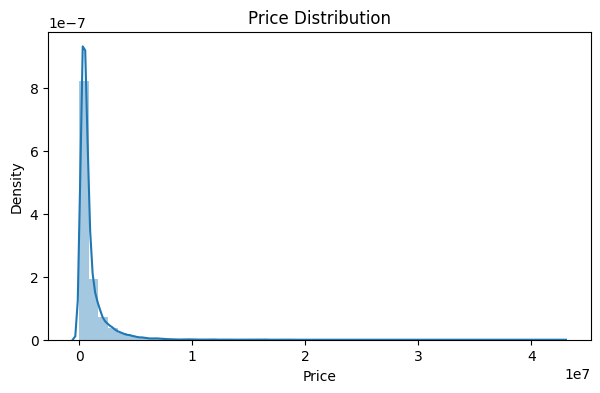

In [18]:
plt.figure(figsize=(7,4))
sns.distplot(df['Price'])
plt.title('Price Distribution')

In [19]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr = q3-q1
iqr

np.float64(675000.0)

In [20]:
# Removing outliers with generic formula

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

df_new = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]

Text(0.5, 1.0, 'Price Distribution After')

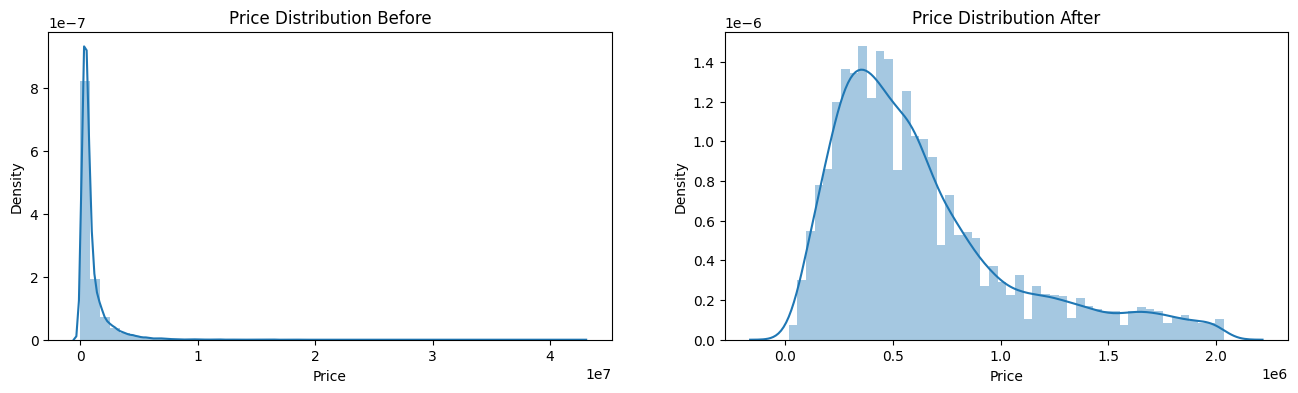

In [21]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(df['Price'])
plt.title('Price Distribution Before')

plt.subplot(1,2,2)
sns.distplot(df_new['Price'])
plt.title('Price Distribution After')

In [22]:
df = df_new
df

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0
1,Toyota,Innova,180,190000.0,Manual,second,Diesel,375000.0
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0
...,...,...,...,...,...,...,...,...
6006,Maruti Suzuki,Swift,134,27365.0,Manual,first,Diesel,475000.0
6007,Hyundai,Xcent,122,100000.0,Manual,first,Diesel,400000.0
6008,Mahindra,Xylo,158,55000.0,Manual,second,Diesel,290000.0
6009,Maruti Suzuki,WagonR,146,46000.0,Manual,first,Petrol,265000.0


Text(0.5, 1.0, 'Age Distribution')

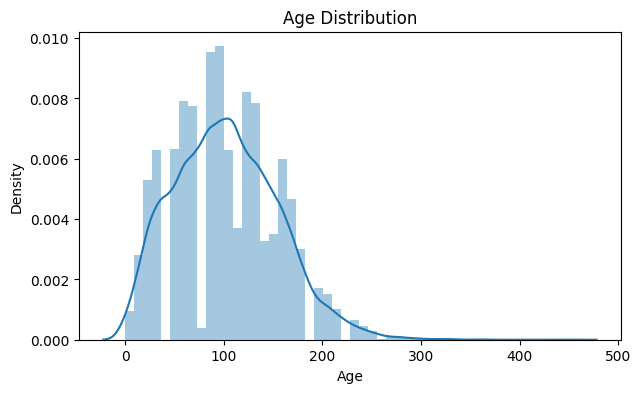

In [23]:
plt.figure(figsize=(7,4))
sns.distplot(df['Age'])
plt.title('Age Distribution')

##### It is good

Text(0.5, 1.0, 'KmDriven Distribution')

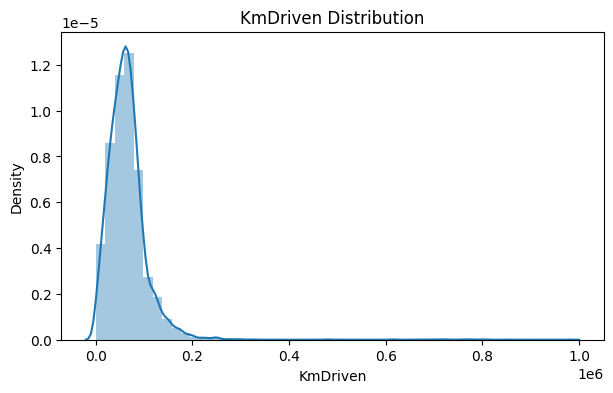

In [24]:
plt.figure(figsize=(7,4))
sns.distplot(df['KmDriven'])
plt.title('KmDriven Distribution')

In [25]:
q1 = df['KmDriven'].quantile(0.25)
q3 = df['KmDriven'].quantile(0.75)

iqr = q3-q1
iqr

np.float64(41728.5)

In [26]:
# Removing outliers with formula

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

df_new = df[(df['KmDriven'] > lower_bound) & (df['KmDriven'] < upper_bound)]

Text(0.5, 1.0, 'KmDriven Distribution After')

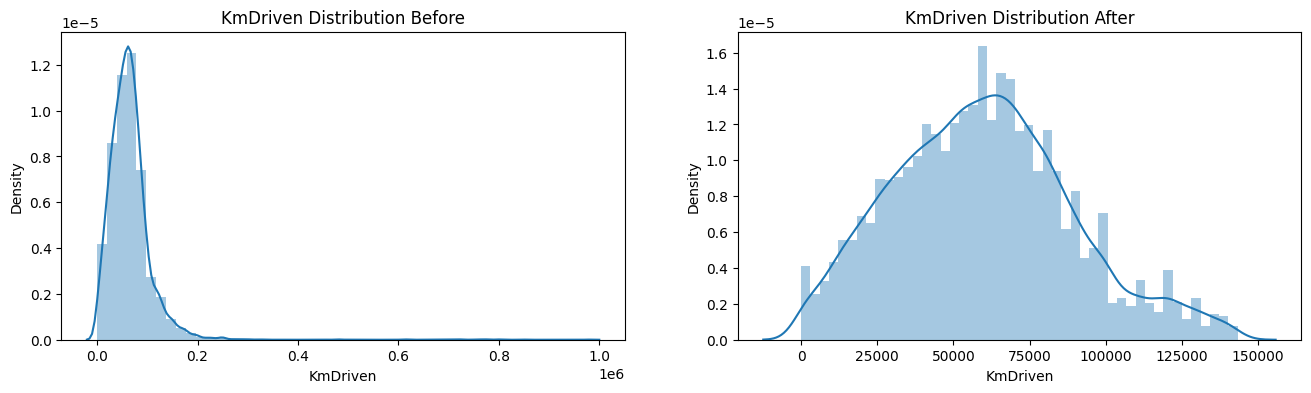

In [27]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(df['KmDriven'])
plt.title('KmDriven Distribution Before')

plt.subplot(1,2,2)
sns.distplot(df_new['KmDriven'])
plt.title('KmDriven Distribution After')

In [28]:
df = df_new
df

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0
5,BMW,X3,120,83000.0,Automatic,first,Diesel,1350000.0
...,...,...,...,...,...,...,...,...
6006,Maruti Suzuki,Swift,134,27365.0,Manual,first,Diesel,475000.0
6007,Hyundai,Xcent,122,100000.0,Manual,first,Diesel,400000.0
6008,Mahindra,Xylo,158,55000.0,Manual,second,Diesel,290000.0
6009,Maruti Suzuki,WagonR,146,46000.0,Manual,first,Petrol,265000.0


#### Correlation

Text(0.5, 1.0, 'KmDriven vs Price')

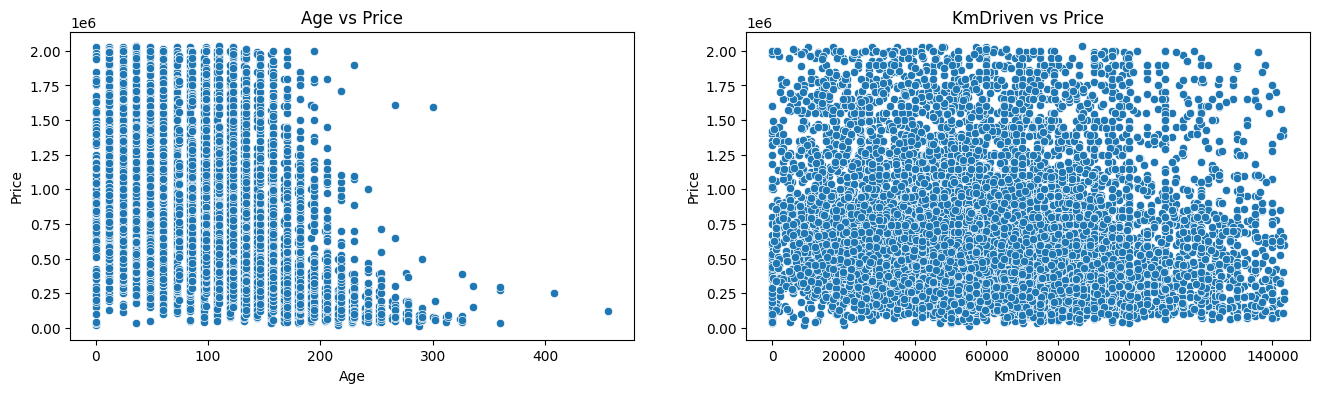

In [29]:
# Plotting all the numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'], y=df['Price'])
plt.title('Age vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x=df['KmDriven'], y=df['Price'])
plt.title('KmDriven vs Price')

###### The relationship is not linear so Linear Regression will not be appropriate

Text(0.5, 1.0, 'Price')

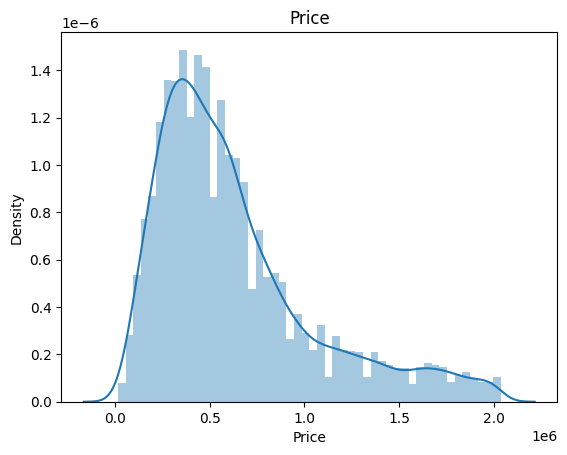

In [30]:
sns.distplot(df['Price'])
plt.title('Price')

###### The price we have in the data is not linear
###### We can use log transformation to see the relationship with price

In [31]:
log_price = np.log(df['Price'])

df['log_price'] = log_price

df.head()

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,Price,log_price
0,Honda,City,276,98000.0,Manual,second,Petrol,195000.0,12.180755
2,Volkswagen,Vento,168,77246.0,Manual,first,Diesel,184999.0,12.128106
3,Maruti Suzuki,Swift,84,83500.0,Manual,second,Diesel,565000.0,13.244581
4,Maruti Suzuki,Baleno,60,45000.0,Automatic,first,Petrol,685000.0,13.437174
5,BMW,X3,120,83000.0,Automatic,first,Diesel,1350000.0,14.115615


Text(0.5, 1.0, 'KmDriven vs Log Price')

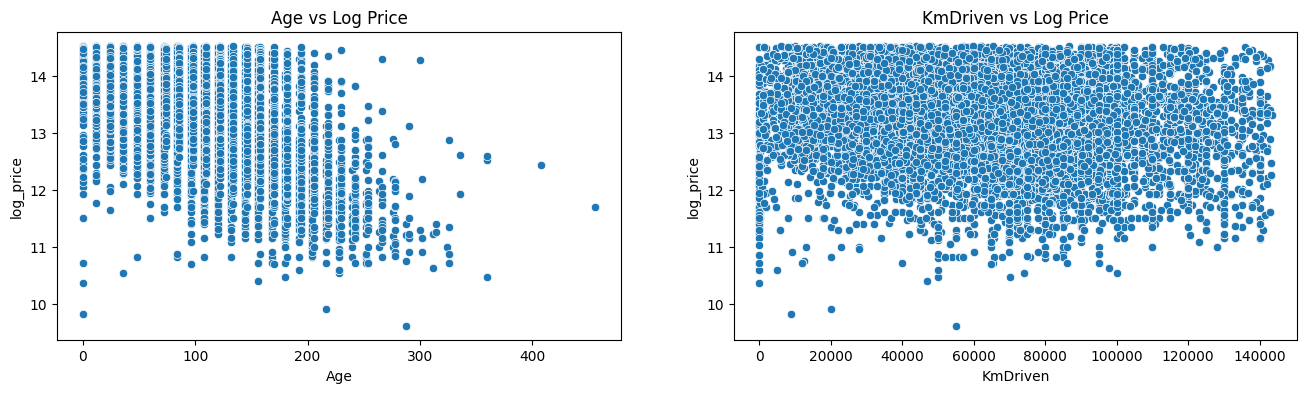

In [32]:
# Plotting all the numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'], y=df['log_price'])
plt.title('Age vs Log Price')

plt.subplot(1,2,2)
sns.scatterplot(x=df['KmDriven'], y=df['log_price'])
plt.title('KmDriven vs Log Price')

###### We can observe a linear pattern now
###### Better but not that great

In [33]:
# Dropping the Price column as it's no longer needed

df = df.drop('Price', axis=1)

#### Now checking the multicollinearity

In [34]:
df.columns

Index(['Brand', 'Model', 'Age', 'KmDriven', 'Transmission', 'Owner',
       'FuelType', 'log_price'],
      dtype='object')

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Taking the numerical columns
var = df[['Age', 'KmDriven']]

# Create a df with only three column
vif_df = pd.DataFrame()

# Adding column
vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['features'] = var.columns

vif_df

,VIF,features
0,4.09872,Age
1,4.09872,KmDriven


###### The vif between 1-5 is generally okay

### Encoding

In [36]:
# Creating dictionary for every categorical column

Brand_dict = dict()
Model_dict = dict()
Transmission_dict = dict()
Owner_dict = dict()
FuelType_dict = dict()

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Brand column
df['Brand'] = encoder.fit_transform(df['Brand'])
for num, lbl in enumerate(encoder.classes_):
    Brand_dict[lbl] = num
print('Brand label saved')

# Model column
df['Model'] = encoder.fit_transform(df['Model'])
for num, lbl in enumerate(encoder.classes_):
    Model_dict[lbl] = num
print('Model label saved')

# Transmission column
df['Transmission'] = encoder.fit_transform(df['Transmission'])
for num, lbl in enumerate(encoder.classes_):
    Transmission_dict[lbl] = num
print('Transmission label saved')

# Owner column
df['Owner'] = encoder.fit_transform(df['Owner'])
for num, lbl in enumerate(encoder.classes_):
    Owner_dict[lbl] = num
print('Owner label saved')

# Fuel Type column
df['FuelType'] = encoder.fit_transform(df['FuelType'])
for num, lbl in enumerate(encoder.classes_):
    FuelType_dict[lbl] = num
print('FuelType label saved')

Brand label saved
Model label saved
Transmission label saved
Owner label saved
FuelType label saved


In [38]:
Brand_dict

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Bajaj': 4,
 'Chevrolet': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force Motors': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Land Rover': 17,
 'Lexus': 18,
 'MG': 19,
 'Mahindra': 20,
 'Maruti Suzuki': 21,
 'Mercedes-Benz': 22,
 'Mini': 23,
 'Mitsubishi': 24,
 'Nissan': 25,
 'Opel': 26,
 'Porsche': 27,
 'Renault': 28,
 'Rolls-Royce': 29,
 'Skoda': 30,
 'Smart': 31,
 'Ssangyong': 32,
 'Tata': 33,
 'Toyota': 34,
 'Volkswagen': 35,
 'Volvo': 36}

In [39]:
# Putting all the encoded dict in txt file
filename = '../Dataset/categorical_mappings.txt'

# Open the file in write mode
with open(filename, 'w') as file:
    # Write Brand_dict
    file.write("Brand Dictionary:\n")
    for brand, label in Brand_dict.items():
        file.write(f"'{brand}': {label},\n")
    
    # Write Model_dict
    file.write("\nModel Dictionary:\n")
    for model, label in Model_dict.items():
        file.write(f"'{model}': {label},\n")

    # Write Transmission_dict
    file.write("\nTransmission Dictionary:\n")
    for transmission, label in Transmission_dict.items():
        file.write(f"'{transmission}': {label},\n")

    # Write Owner_dict
    file.write("\nOwner Dictionary:\n")
    for owner, label in Owner_dict.items():
        file.write(f"'{owner}': {label},\n")

    # Write FuelType_dict
    file.write("\nFuel Type Dictionary:\n")
    for fuel_type, label in FuelType_dict.items():
        file.write(f"'{fuel_type}': {label},\n")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17708 entries, 0 to 6010
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         17708 non-null  int64  
 1   Model         17708 non-null  int64  
 2   Age           17708 non-null  int64  
 3   KmDriven      17708 non-null  float64
 4   Transmission  17708 non-null  int64  
 5   Owner         17708 non-null  int64  
 6   FuelType      17708 non-null  int64  
 7   log_price     17708 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [41]:
df

,Brand,Model,Age,KmDriven,Transmission,Owner,FuelType,log_price
0,10,48,276,98000.0,1,2,4,12.180755
2,35,213,168,77246.0,1,0,0,12.128106
3,21,195,84,83500.0,1,2,0,13.244581
4,21,29,60,45000.0,0,0,4,13.437174
5,3,224,120,83000.0,0,0,0,14.115615
...,...,...,...,...,...,...,...,...
6006,21,195,134,27365.0,1,0,0,13.071070
6007,11,236,122,100000.0,1,0,0,12.899220
6008,20,238,158,55000.0,1,2,0,12.577636
6009,21,221,146,46000.0,1,0,4,12.487485


### Model Training

#### Splitting training and testing data

In [42]:
from sklearn.model_selection import train_test_split

x = df.drop(['log_price'], axis=1)
y = df['log_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (14166, 7)
Testing set shape: (3542, 7)


#### Metrics

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

def metric_calc(x, y):
    y_pred = model.predict(x)
    y_true = y
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # adjusted r2
    # number of values in the data set
    n = y_true.size
    # number of independent features
    k = 7
    adjusted_r2 = 1 - ((1-r2) * ((n - 1) / (n - (k + 1))))
    adjusted_r2
    
    print(f"Metrics:\n mae = {mae}\n mse = {mse}\n rmse = {rmse}\n r2 = {r2}\n adjusted_r2 = {adjusted_r2}")

def print_metric(x_train, y_train, x_test, y_test):
    print(f"Training")
    metric_calc(x_train, y_train)
    print()
    print(f"Testing")
    metric_calc(x_test, y_test)

#### Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
print_metric(x_train, y_train, x_test, y_test)

Training
Metrics:
 mae = 0.3922137745746741
 mse = 0.25143223277910975
 rmse = 0.5014301873432729
 r2 = 0.46612662574859864
 adjusted_r2 = 0.46586266801305964

Testing
Metrics:
 mae = 0.38677774660099273
 mse = 0.24533289002410774
 rmse = 0.49531090238769
 r2 = 0.47423193315863166
 adjusted_r2 = 0.4731905136713964


#### Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
print_metric(x_train, y_train, x_test, y_test)

Training
Metrics:
 mae = 0.07887452733265947
 mse = 0.012898919168938316
 rmse = 0.11357340872289744
 r2 = 0.9726113496873448
 adjusted_r2 = 0.9725978081876846

Testing
Metrics:
 mae = 0.20783017163869058
 mse = 0.08400862643200721
 rmse = 0.28984241655079956
 r2 = 0.8199627733859296
 adjusted_r2 = 0.8196061631464564


#### Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2',  # Use R² as the scoring metric
                           cv=5,          # Number of cross-validation folds
                           verbose=2,
                           n_jobs=-1)     # Use all available cores

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_   # Best cross-validation R² score

print("Best Parameters:", best_params)
print("Best Cross-Validation R²:", best_score)

# Evaluate on the test set using the best estimator from grid search
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Calculate metrics on the test set
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation R²: 0.7939986073283329
Test MAE: 0.21870485171412782
Test MSE: 0.09122279649571831
Test RMSE: 0.3020311184227849
Test R²: 0.8045022281329488


###### It is giving even less accuracy

### Saving the model

In [49]:
import pickle

with open('../Dataset/Used_Car_Price_Prediction.pkl', 'wb') as file:
    pickle.dump(model, file)